# Statistics review 4: Sample Size calculations

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC137461/pdf/cc1521.pdf)

## Key learning points

- Studies must be adequately powered to achieve their aims, and appropriate sample size calculations should be carried out at the design stage of any study.
- Estimation of the expected size of effect can be difficult and should, wherever possible, be based on existing evidence and clinical expertise. It is important that any estimates be large enough to be clinically important while also remaining plausible.
- Many apparently null studies may be under-powered rather than genuinely demonstrating no difference between groups; absence of evidence is not evidence of absence.

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [40]:
options(repr.plot.width=4, repr.plot.height=3)

## Power

Power is is the probability of correctly identifying a difference between the two groups in the study sample when one genuinely exists in the populations from which the samples were drawn.

### Problem with small sample sizes

Suppose that a drug can lower blood pressure by 10 mm Hg on average, and that the standard deviation of the drug effect is also 10 mm Hg. We will run some simulations with two populations each of size $n$ to see what sample size is needed to get a power of 0.9.

In [26]:
n.expts <- 1000
alpha <- 0.05

ns <- seq(3, 25, by=1)

data <- matrix(NA, nrow=length(ns), ncol=2, dimnames=list(NULL, c("n", "power")))

for (n in seq(3, 25, by=1)) {
    success <- 0
    for (expt in 1:n.expts) {
        effect <- rnorm(n, mean=10, sd=10)
        p <- t.test(effect)$p.value
        if (p < alpha) {
            success <- success + 1
        }
    }
    data[n-2, 1] <- n
    data[n-2, 2] <- success/n.expts
}

In [27]:
as.data.frame(data)

n,power
3,0.172
4,0.309
5,0.397
6,0.510
7,0.585
8,0.689
9,0.769
10,0.788
11,0.842
12,0.883


### Interpretation of simulation results

It appears as if a sample size of 13 will give a power of 0.9 with the given effect size. 

## Factors that affect sample size calculations

The following affect sample size calculations

- p value threshold (a 0.01 threshold requires a larger sample size than a 0.05 threshold)
- power (0.9 power requires a larger sample size than 0.8 power)
- effect size (small effect sizes require a larger sample size than large effect sizes)

### Using a library to calculate power

One of the most convenient libraries in R for simple sample size calculations is `pwr`. We will use it to illustrate many of the calculations done in the paper.

In [28]:
library(pwr)

#### Check simulation results

In [30]:
d <- 10/10 # effect size is change over standard deviaiton
pwr.t.test(d = d, sig.level = 0.05, power = 0.9, type = "one.sample")


     One-sample t test power calculation 

              n = 12.58546
              d = 1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided


#### Small p-value thresholds need larger sample sizes

In [31]:
pwr.t.test(d = 1, sig.level = 0.01, power = 0.9, type = "one.sample")


     One-sample t test power calculation 

              n = 18.30346
              d = 1
      sig.level = 0.01
          power = 0.9
    alternative = two.sided


In [32]:
pwr.t.test(d = 1, sig.level = 0.1, power = 0.9, type = "one.sample")


     One-sample t test power calculation 

              n = 10.08101
              d = 1
      sig.level = 0.1
          power = 0.9
    alternative = two.sided


#### Large power needs larger sample sizes

In [33]:
pwr.t.test(d = 1, sig.level = 0.05, power = 0.8, type = "one.sample")


     One-sample t test power calculation 

              n = 9.93785
              d = 1
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


In [34]:
pwr.t.test(d = 1, sig.level = 0.05, power = 0.9, type = "one.sample")


     One-sample t test power calculation 

              n = 12.58546
              d = 1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided


#### Small effect size needs larger sample size

In [35]:
pwr.t.test(d = 0.1, sig.level = 0.05, power = 0.9, type = "one.sample")


     One-sample t test power calculation 

              n = 1052.665
              d = 0.1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided


In [36]:
pwr.t.test(d = 1.0, sig.level = 0.05, power = 0.9, type = "one.sample")


     One-sample t test power calculation 

              n = 12.58546
              d = 1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided


Note that an effect size of 1.0 is considered to be large. The before/after changes look like this when d=1.

In [46]:
x <- seq(-3, 4, length.out = 100)
y1 <- dnorm(x, 0, 1)
y2 <- dnorm(x, 1, 1)
df <- data.frame(x=x, y1=y1, y2=y2)

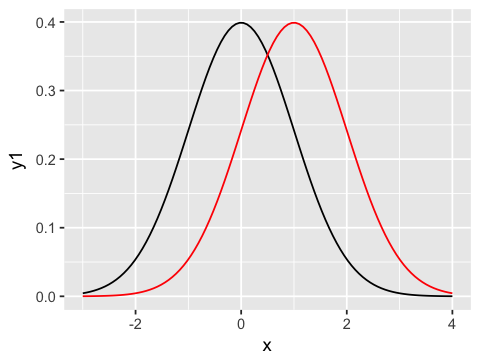

In [47]:
ggplot(df, aes(x=x, y=y1)) +
geom_line() + 
geom_line(aes(y = y2), color="red")

### Sample size calculation for a difference in means (equal sized groups)

In [48]:
pwr.t.test(d = 1.0, sig.level = 0.05, power = 0.9, type = "two.sample")


     Two-sample t test power calculation 

              n = 22.02109
              d = 1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


### Sample size calculation for a difference in means (different sized groups)

Suppose one of the treatment groups is fixed in size.

In [51]:
pwr.t2n.test(d = 1.0, n1 = 20, sig.level = 0.05, power = 0.9)


     t test power calculation 

             n1 = 20
             n2 = 24.47031
              d = 1
      sig.level = 0.05
          power = 0.9
    alternative = two.sided


### Sample size calculation for a difference in proportions (equal sized groups)

In [55]:
p1 <- 0.4
p2 <- 0.6
p <- mean(p1, p2)
h <- (p1 - p2)/sqrt(p*(1-p))

pwr.2p.test(h = h, sig.level = 0.05, power = 0.9)


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.4082483
              n = 126.089
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: same sample sizes


### Sample size calculation for a difference in proportions (different sized groups)

In [56]:
p1 <- 0.4
p2 <- 0.6
p <- mean(p1, p2)
h <- (p1 - p2)/sqrt(p*(1-p))

pwr.2p2n.test(h = h, n1 = 100, sig.level = 0.05, power = 0.9)


     difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.4082483
             n1 = 100
             n2 = 170.5958
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: different sample sizes


### Loss, dropout etc

Obvious adjustments have to be made if loss or dropout is expected. For example, if 10% of the patients in the study are expected to be lost to follow up, we need $n/0.9$ patients to be enrolled.

## Exercises

Suppose we are interested in whether a particular diet results in change of weight. We enroll subjects into two group - group A follows the special diet, and group B follows their regular diet (control). Suppose also that the standard deviation in both groups is the same at 25 lbs. 

**1**. If we want to detect an effect of the diet of 10 lbs or more with 0.9 power and 0.05 significance level, how many subjects do we need for each group (assume equal size groups)?

**2**. If 20% of the patients are expected to drop-out before the study is completed, how many subjects would need to be enrolled for the same study design as in Ex. 1?

**3** Make a graph where the x-axis shows the sample size from 10 to 100, the y-axis shows the power from 0 to 1, and plot separate curves for effect sizes of 10, 25 and 40 lbs.